In [41]:
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## without weather data

In [101]:
dir = '/Users/Loielaine/Desktop/umich-2019/EECS545/project/code/545project/'
train = np.loadtxt(dir+'train_sample_no_weather.csv',delimiter=',')
test = np.loadtxt(dir+'test_sample_no_weather.csv',delimiter=',')

In [102]:
X_train = train[:,:-3]
y_train = train[:,-3:]
X_test = test[:,:-3]
y_test = test[:,-3:]

In [103]:
train.shape

(9655, 29)

In [104]:
y_train0 = y_train[:,0]
y_train1 = y_train[:,1] 
y_train2 = y_train[:,2] 

In [105]:
# scaling
def MinMaxScaling(X):
    scaler =preprocessing.MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    return X

In [106]:
X_train = MinMaxScaling(X_train)
X_test = MinMaxScaling(X_test)

### p20

In [90]:
regr0 = linear_model.LinearRegression()

# Train the model using the training sets
regr0.fit(X_train, y_train0)

# Make predictions using the testing set
ypred0 = regr0.predict(X_test)

In [91]:
mean_squared_error(y_test[:,0],ypred0)

68.68942682982083

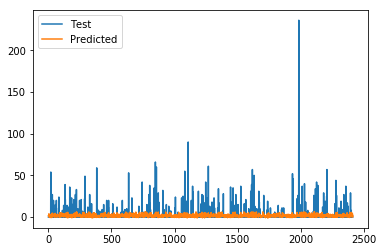

In [109]:
plt.plot(y_test[:,0],label='Test')
plt.plot(ypred0,label='Predicted')
plt.legend()
plt.show()

### p50  - p20

In [92]:
regr1 = linear_model.LinearRegression()

# Train the model using the training sets
regr1.fit(X_train, y_train1)

# Make predictions using the testing set
ypred1 = regr1.predict(X_test)

In [93]:
mean_squared_error(y_test[:,1]-y_test[:,0] ,ypred1)

132.53955439683713

In [94]:
mean_squared_error(y_test[:,1] ,ypred1+ypred0)

243.8013103646292

### p50

In [96]:
regr1 = linear_model.LinearRegression()

# Train the model using the training sets
regr1.fit(X_train, y_train[:,1])

# Make predictions using the testing set
ypred1 = regr1.predict(X_test)

In [97]:
mean_squared_error(y_test[:,1] ,ypred1)

243.85203581322494

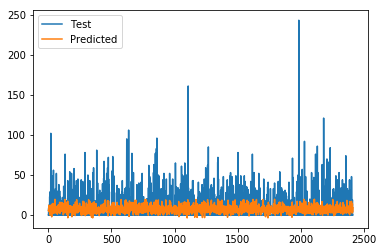

In [110]:
plt.plot(y_test[:,1],label='Test')
plt.plot(ypred1,label='Predicted')
plt.legend()
plt.show()

### p80 

In [107]:
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_train, y_train2)

# Make predictions using the testing set
ypred2 = regr2.predict(X_test)

In [108]:
mean_squared_error(y_test[:,2] ,ypred2)

764.8869271898625

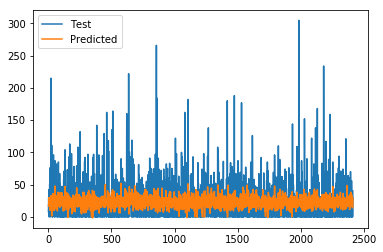

In [111]:
plt.plot(y_test[:,2],label='Test')
plt.plot(ypred2,label='Predicted')
plt.legend()
plt.show()

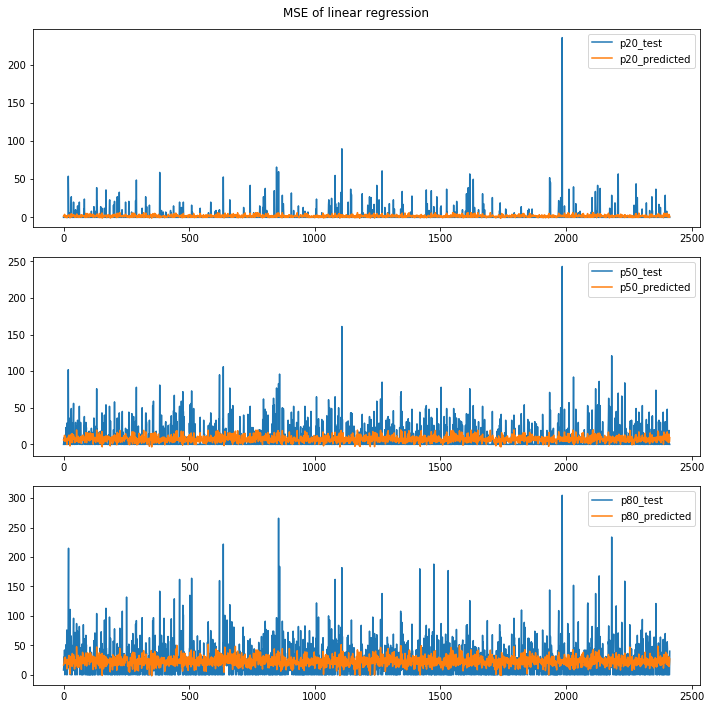

In [144]:
fig, axs = plt.subplots(3,1,figsize=(10,10))
axs[0].plot(y_test[:,0],label='p20_test')
axs[0].plot(ypred0,label='p20_predicted')
axs[1].plot(y_test[:,1],label='p50_test')
axs[1].plot(ypred1,label='p50_predicted')
axs[2].plot(y_test[:,2],label='p80_test')
axs[2].plot(ypred2,label='p80_predicted')
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.suptitle('MSE of linear regression')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()